In [1]:
import scipy
from netCDF4 import Dataset
import numpy as np
from scipy.spatial import KDTree
from ll_xy import lonlat_to_xy
import itertools
import matplotlib.pyplot as plt
import datetime
import calendar
import pandas as pd
import os
import pickle
import h5py

In [2]:
satam_directory = '/home/robbie/uit_mnt/Data/romal7177/ResearchData/IFT/EarthObservation/SatelliteAltimetry/'
directory=f'{satam_directory}OSISAF Sea Ice Type'
f = '2019/12/ice_type_nh_polstere-100_multi_201912201200.nc'
x = Dataset(f'{directory}/{f}')
longrid = np.array(x['lon'])
latgrid = np.array(x['lat'])
xgrid,ygrid=lonlat_to_xy(longrid,latgrid,hemisphere='n')
# pd.DataFrame(xgrid).to_csv('x.csv')
# pd.DataFrame(ygrid).to_csv('y.csv')

In [3]:
directory=f'{satam_directory}OSISAF Sea Ice Type'
f = '2019/12/ice_type_nh_polstere-100_multi_201912201200.nc'
x = Dataset(f'{directory}/{f}')
longrid = np.array(x['lon'])
latgrid = np.array(x['lat'])
xgrid,ygrid=lonlat_to_xy(longrid,latgrid,hemisphere='n')
#xgrid = np.array(pd.read_csv('x.csv',index_col=False).iloc[:,:-1])
#ygrid = np.array(pd.read_csv('y.csv',index_col=False).iloc[:,:-1])

tree = KDTree(list(zip(xgrid.ravel(),
                       ygrid.ravel())))



cs2_directory=f'{satam_directory}CryoSat-2 L1B Retracked Baseline E'
cs2_files = sorted(os.listdir(cs2_directory))
cs2_files = [c for c in cs2_files if '_SAR_' in c]
winter_months=[1,2,3,4,10,11,12]

mon_yr_pairs = []

for year in np.arange(2011,2023):
    for month in winter_months:
        mon_yr_pairs.append((year,month))
for month in [10,11,12]:
    mon_yr_pairs.append((2010,month))
for month in [1,2,3,4]:
    mon_yr_pairs.append((2023,month))
    
# Run code

In [4]:
lats = []

for year,month in mon_yr_pairs:
    
    mean_grids = []

    days_in_month = calendar.monthrange(year,month)[1]

    for day in np.arange(1,days_in_month+1):
        print(day)
        date = datetime.date(year,month,day)

        # Format it into a string
        date_str_cs2 = f'{date.year}_{str(date.month).zfill(2)}_{str(date.day).zfill(2)}'

        cs2_files_on_day = [x for x in cs2_files if date_str_cs2 in x]

        basic_dict = {(a,b):[] for a,b in itertools.product(np.arange(xgrid.shape[0]),
                                                            np.arange(xgrid.shape[1]))}

        for f in cs2_files_on_day:

            cs2 = scipy.io.loadmat(f'{cs2_directory}/{f}')

            #cs2['parameters_header'][0,16]=pp
            PP = np.array(cs2['parameters'][:,16])
            
            
            #cs2['parameters_header'][0,15]=lew
            lew = np.array(cs2['parameters'][:,15])/(1.563e-8)
            
            at_lons = np.array(cs2['lon'][:,0])
            at_lats = np.array(cs2['lat'][:,0])
            sig0db = np.array(cs2['sigma_0'][:,0])
            sig0_lin = 10 ** (sig0db/10)

            
            
            
            df = pd.DataFrame({'lon':at_lons,
                               'lat':at_lats,
                               'lew':lew,
                               'PP':PP,
                               'sig0':sig0_lin})
            
            print(df.shape)
            
            df.dropna(inplace=True)
            
            lats.append(df['lat'])
            
            ### Comment out below this
            
            
#             print(df.shape)
            
#         #     # Supp of https://doi.org/10.1002/2015GL064823
#             df = df[df['lew']<3]
#             print(df.shape)
#             df = df[df['PP']<5]
            
#             print(df.shape)



#             at_x, at_y = lonlat_to_xy(np.array(df['lon']),
#                                       np.array(df['lat']),
#                                       hemisphere='n')
#             dist,ind = tree.query(np.array([at_x,at_y]).T)

#             ind2d = np.unravel_index(ind, xgrid.shape)

#             for (a,b,s) in zip(ind2d[0],ind2d[1],df['sig0']):
#                 basic_dict[(a,b)].append(s)
                
#             break

#         vals,xscat,yscat = [],[],[]

#         mean_vals = np.full(xgrid.shape,np.nan)
#         for key, value in basic_dict.items():


#             if value:
#                 mean_vals[key[0],key[1]] = np.nanmean(value)

#         mean_grids.append(mean_vals)
        
#         break
        
#     break

# #     pickle.dump(mean_grids,open(f'{scratch}cs2_{month}_{year}.p','wb'))

1
(785, 5)
(10335, 5)
(10234, 5)
(5738, 5)
(300, 5)
(9100, 5)
(3931, 5)
(515, 5)
(2945, 5)
(2069, 5)
(9073, 5)
(2387, 5)
(1403, 5)
(9988, 5)
(1323, 5)
(460, 5)
(1814, 5)
(6090, 5)
(1637, 5)
(1118, 5)
(6868, 5)
(1929, 5)
(81, 5)
(2004, 5)
(53, 5)
(6068, 5)
(1004, 5)
(259, 5)
(3137, 5)
(613, 5)
(2626, 5)
(1281, 5)
(5575, 5)
(709, 5)
(9410, 5)
(958, 5)
(1382, 5)
(516, 5)
(1237, 5)
(5277, 5)
(3955, 5)
(917, 5)
(1557, 5)
(2420, 5)
(372, 5)
(3558, 5)
(13704, 5)
(422, 5)
(6674, 5)
(3360, 5)
(4695, 5)
(7191, 5)
(1739, 5)
(67, 5)
(332, 5)
(95, 5)
(423, 5)
(156, 5)
(2120, 5)
(219, 5)
(8378, 5)
(933, 5)
(157, 5)
(4724, 5)
(3167, 5)
2
(3330, 5)
(7228, 5)
(3308, 5)
(5895, 5)
(6411, 5)
(2652, 5)
(2714, 5)
(9253, 5)
(1920, 5)
(170, 5)
(2260, 5)
(729, 5)
(1808, 5)
(8926, 5)
(7598, 5)
(2308, 5)
(2833, 5)
(413, 5)
(242, 5)
(1981, 5)
(8124, 5)
(1497, 5)
(591, 5)
(2082, 5)
(2668, 5)
(3289, 5)
(2481, 5)
(5183, 5)
(1537, 5)
(7991, 5)
(4002, 5)
(1562, 5)
(1703, 5)
(5552, 5)
(74, 5)
(1960, 5)
(1857, 5)
(5219,

KeyboardInterrupt: 

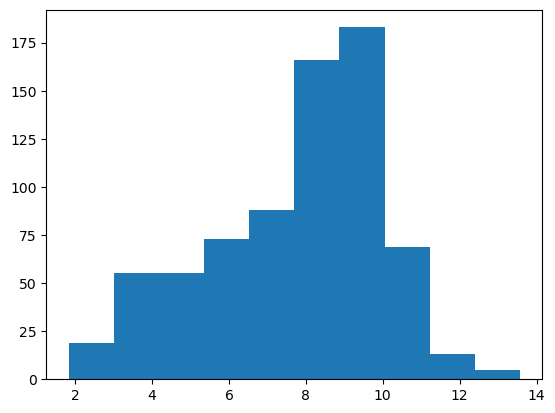

In [85]:
cs2['parameters_header'][0,15]
_=plt.hist(lew)

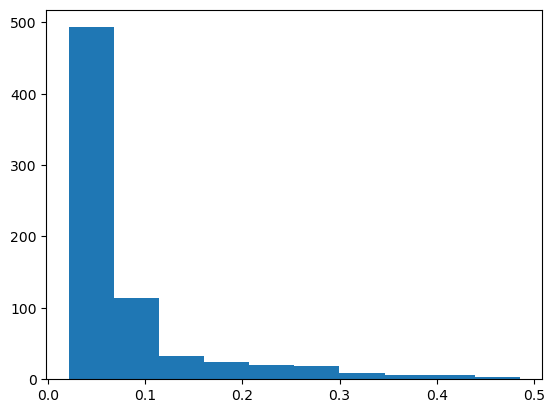

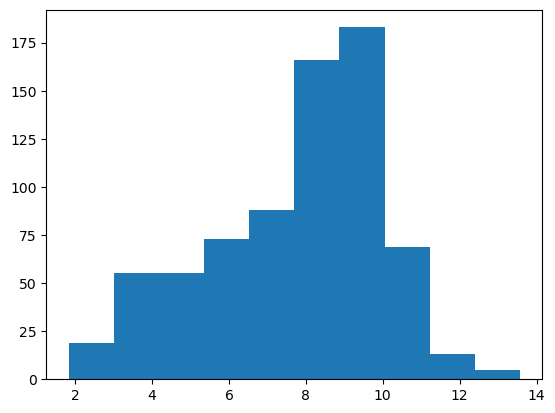

In [4]:
tree = KDTree(list(zip(xgrid.ravel(),
                       ygrid.ravel())))

# Get all AltiKa files on a given day

In [5]:
ak_directory=f'{satam_directory}AltiKa L1B Retracked'
ak_files = os.listdir(ak_directory)
ak_files[0],ak_files[-1]

('altika_L1B_retracked_2018_10_01_003004_123_383.mat',
 'altika_L1B_retracked_2023_04_27_225551_171_088.mat')

In [44]:
# prep month year pairs

winte_months=[1,2,3,4,10,11,12]
top_data = {}

mon_yr_pairs = []

for year in np.arange(2019,2023):
    for month in winter_months:
        mon_yr_pairs.append((year,month))
for month in [10,11,12]:
    mon_yr_pairs.append((2018,month))
for month in [1,2,3,4]:
    mon_yr_pairs.append((2023,month))
pickle.dump(mon_yr_pairs,open('ak_m_y_pairs.p','wb'))    

In [8]:
# Run code

for year,month in mon_yr_pairs:
    
    mean_grids = []

    days_in_month = calendar.monthrange(year,month)[1]

    for day in np.arange(1,days_in_month+1):
        print(day)
        date = datetime.date(year,month,day)

        # Format it into a string
        date_str_ak = f'{date.year}_{str(date.month).zfill(2)}_{str(date.day).zfill(2)}'

        ak_files_on_day = [x for x in ak_files if date_str_ak in x]

        basic_dict = {(a,b):[] for a,b in itertools.product(np.arange(xgrid.shape[0]),
                                                            np.arange(xgrid.shape[1]))}

        for f in ak_files_on_day:

            ak = scipy.io.loadmat(f'{ak_directory}/{f}')
            PP = ak['parameters'][:,20]
            lew = ak['parameters'][:,16]/(2.381e-9)
            at_lons = np.array(ak['lon'][:,0])
            at_lats = np.array(ak['lat'][:,0])
            sig0db = np.array(ak['sig0'][:,0])
            sig0_lin = 10 ** (sig0db/10)

            df = pd.DataFrame({'lon':at_lons,
                               'lat':at_lats,
                               'lew':lew,
                               'PP':PP,
                               'sig0':sig0_lin})
            df.dropna(inplace=True)
        #     # Supp of https://doi.org/10.1002/2015GL064823
            df = df[df['lew']<2]
            df = df[df['PP']<5]



            at_x, at_y = lonlat_to_xy(np.array(df['lon']),
                                      np.array(df['lat']),
                                      hemisphere='n')
            dist,ind = tree.query(np.array([at_x,at_y]).T)

            ind2d = np.unravel_index(ind, xgrid.shape)

            for (a,b,s) in zip(ind2d[0],ind2d[1],df['sig0']):
                basic_dict[(a,b)].append(s)

        vals,xscat,yscat = [],[],[]

        mean_vals = np.full(xgrid.shape,np.nan)
        for key, value in basic_dict.items():


            if value:
                mean_vals[key[0],key[1]] = np.nanmean(value)

        mean_grids.append(mean_vals)

    pickle.dump(mean_grids,open(f'{scratch}ak_{month}_{year}.p','wb'))

In [ ]:
cs2_directory=f'{satam_directory}CryoSat-2 L1B Retracked Baseline E'

cs2_files = sorted(os.listdir(cs2_directory))

cs2_files = [c for c in cs2_files if '_SAR_' in c]

cs2_files[0],cs2_files[-1]

winter_months=[1,2,3,4,10,11,12]

In [45]:
mon_yr_pairs = []

for year in np.arange(2011,2023):
    for month in winter_months:
        mon_yr_pairs.append((year,month))
for month in [10,11,12]:
    mon_yr_pairs.append((2010,month))
for month in [1,2,3,4]:
    mon_yr_pairs.append((2023,month))
    
pickle.dump(mon_yr_pairs,open('cs2_m_y_pairs.p','wb'))    
    

In [18]:
# Run code

for year,month in mon_yr_pairs:
    
    mean_grids = []

    days_in_month = calendar.monthrange(year,month)[1]

    for day in np.arange(1,days_in_month+1):
        print(day)
        date = datetime.date(year,month,day)

        # Format it into a string
        date_str_cs2 = f'{date.year}_{str(date.month).zfill(2)}_{str(date.day).zfill(2)}'

        cs2_files_on_day = [x for x in cs2_files if date_str_cs2 in x]

        basic_dict = {(a,b):[] for a,b in itertools.product(np.arange(xgrid.shape[0]),
                                                            np.arange(xgrid.shape[1]))}

        for f in cs2_files_on_day:

            cs2 = scipy.io.loadmat(f'{cs2_directory}/{f}')

            PP = np.array(cs2['parameters'][:,16])
            lew = np.array(cs2['parameters'][:,17])
            
            at_lons = np.array(cs2['lon'][:,0])
            at_lats = np.array(cs2['lat'][:,0])
            sig0db = np.array(cs2['sigma_0'][:,0])
            sig0_lin = 10 ** (sig0db/10)

            df = pd.DataFrame({'lon':at_lons,
                               'lat':at_lats,
                               'lew':lew,
                               'PP':PP,
                               'sig0':sig0_lin})
            df.dropna(inplace=True)
        #     # Supp of https://doi.org/10.1002/2015GL064823
            df = df[df['lew']<2]
            df = df[df['PP']<5]



            at_x, at_y = lonlat_to_xy(np.array(df['lon']),
                                      np.array(df['lat']),
                                      hemisphere='n')
            dist,ind = tree.query(np.array([at_x,at_y]).T)

            ind2d = np.unravel_index(ind, xgrid.shape)

            for (a,b,s) in zip(ind2d[0],ind2d[1],df['sig0']):
                basic_dict[(a,b)].append(s)

        vals,xscat,yscat = [],[],[]

        mean_vals = np.full(xgrid.shape,np.nan)
        for key, value in basic_dict.items():


            if value:
                mean_vals[key[0],key[1]] = np.nanmean(value)

        mean_grids.append(mean_vals)

    pickle.dump(mean_grids,open(f'{scratch}cs2_{month}_{year}.p','wb'))

('cryosat_L1B_LARM_SAR_retracked_2010_10_01_001624.mat',
 'cryosat_L1B_LARM_SAR_retracked_2023_04_30_235430.mat')

In [26]:
directory=f'{satam_directory}OSISAF Sea Ice Concentration'
f = '2019/ice_conc_nh_ease2-250_icdr-v2p0_201909181200.nc'
x = Dataset(f'{directory}/{f}')
x

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Interim Sea Ice Concentration Climate Data Record from EUMETSAT OSI SAF
    summary: This Interim Climate Data Record implements an extension of the OSI-450 OSI SAF CDR (doi:10.15770/EUM_SAF_OSI_0008). This climate data record of sea ice concentration is obtained from coarse resolution passive microwave satellite data over the polar regions (SMMR, SSM/I, and SSMIS). The processing chain features: 1) dynamic tuning of tie-points and algorithms,  2) correction of atmospheric noise using a Radiative Transfer Model,  3) computation of per-pixel uncertainties, and 4) an optimal hybrid sea ice concentration algorithm. This dataset was generated by the EUMETSAT Ocean and Sea Ice Satellite Application Facility (OSI SAF). The ESA CCI Programme contributed with Research and Development on the algorithms.
    topiccategory: Oceans ClimatologyMeteorologyAtmosphere
    keywords: Earth Science > 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Daily Sea Ice Type Analysis from OSI SAF EUMETSAT
    product_id: OSI-403
    product_name: osi_saf_ice_type
    product_status: operational
    abstract: The daily analysis of sea ice types is obtained from  operation
satellite  images  of  the  polar  regions.  It  is  based   on
atmospherically corrected signal and a Bayesian merging approch
to estimate sea ice class probabilities. This product is freely
available  from  the  EUMETSAT  Ocean  and  Sea  Ice  Satellite
Application Facility (OSI SAF).
    topiccategory: Oceans ClimatologyMeteorologyAtmosphere
    keywords: Sea Ice Type,Sea Ice,Oceanography,Meteorology,Climate,Remote Sensing
    gcmd_keywords: Cryosphere > Sea Ice > Ice Types
Oceans > Sea Ice > Ice Types
Geographic Region > Northern Hemisphere
Vertical Location > Sea Surface
EUMETSAT/OSISAF > Satellite Application Facility on Ocean and Sea Ice, European Organisati

In [28]:
directory=f'{satam_directory}NSIDC Sea Ice Age'
f = 'iceage_nh_12.5km_20190101_20191231_v4.1.nc'
x = Dataset(f'{directory}/{f}')
x

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    version: 4.1
    release_date: July 2020
    Conventions: CF-1.4
    citation: Tschudi, M. A., Meier, W. N., and Stewart, J. S.: An enhancement to sea ice motion and age products, The Cryosphere Discuss., https://doi.org/10.5194/tc-2019-40, in review, 2019.
    dataset_doi: 10.5067/UTAV7490FEPB
    dimensions(sizes): x(722), y(722), time(52)
    variables(dimensions): float32 x(x), float32 y(y), float64 time(time), int32 crs(), uint8 age_of_sea_ice(time, y, x), float32 latitude(y, x), float32 longitude(y, x)
    groups: 